# EDA-4. Статистические тесты

## 1. Введение

Представим, что перед полноценным запуском рекомендательной системы в онлайн-магазине мы протестировали её на части покупателей и увидели, что средний чек заказа вырос. Означает ли это, что мы увидим такой же результат и на других заказах? Можно ли запускать рекомендательную систему для всех покупателей?

Отвечать на подобные вопросы позволяет аппарат статистических тестов.

Статистические тесты — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Вам будут встречаться разнообразные бизнес-задачи, и статистические тесты позволят избегать ошибочных решений. В примере выше благодаря статистическим тестам удастся сэкономить ресурсы компании, если окажется, что запуск рекомендательной системы на самом деле неэффективен.

Важно отметить, что статистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. Чтобы правильно их использовать, требуются определённые знания, в том числе в области математической статистики. Кроме того, результаты статистических тестов могут зависеть от выбора метода и параметров, которые использовались при их проведении. Поэтому важно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

В этом модуле мы узнаем, как проводить статистические тесты, выбирать подходящий тест и оценивать результаты исследования.

Модуль можно условно разделить на две части:

Первая посвящена теории: мы изучим основные определения и понятия, связанные со статистическими тестами.
Во второй части мы перейдём к практическим примерам и задачам и решим их на Python.

В МОДУЛЕ МЫ РАЗБЕРЁМ:

* что такое статистическая гипотеза;

* какие бывают статистические тесты;

* что такое значимость, уровень значимости, ошибки первого и второго рода.

ВЫ НАУЧИТЕСЬ:

* различать типы гипотез;

* выдвигать собственные гипотезы;

* самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки;

* проводить различные статистические тесты на языке Python.

## 2. Необходимость в статистических тестах

Несмотря на то что статистические тесты часто используют для принятия бизнес-решений, всё же бывают ситуации, когда обращаться к ним необязательно. О таких ситуациях мы поговорим отдельно в конце модуля.

В этом и последующих юнитах мы рассмотрим случаи, когда без статистических тестов не обойтись. Для начала введём понятия «генеральной совокупности» и «выборки» — они пригодятся нам в дальнейших рассуждениях.

Генеральной совокупностью называется всё множество интересующих нас объектов, а выборкой — случайное подмножество этого множества.

Часто множество объектов генеральной совокупности настолько большое, что мы не можем посчитать все объекты. Например, все заказы в онлайн-магазине — это генеральная совокупность, а часть заказов — выборка. Мы не можем посчитать все заказы как минимум потому, что часть из них ещё не совершена.

Мы уже знаем, что на основе выборки (части наблюдений) можно измерить следующие показатели:

* выборочное среднее (центральная мера распределения);
* выборочное стандартное отклонение (мера разброса);
* выборочная пропорция.

Однако на самом деле нас всегда интересуют параметры генеральной совокупности:

* истинное среднее — математическое ожидание («мю»);
* истинное стандартное отклонение («сигма»);
* истинная пропорция (p).

Например, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

Выборочная статистика — это случайная величина, так как рассчитана на случайной выборке. Например, значение среднего на двух разных выборках будет разным.

Параметр генеральной совокупности — это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Однако благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.

Как это можно сделать? Давайте разбираться.

Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. Команда Data Science должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам.

Как тогда поступить?

1. Показать рекомендации только части покупателей (выборке).
2. Замерить средний чек на полученной выборке (пусть он получится равным N рублей).
3. Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.
4. Сделать вывод, запускать ли рекомендательную систему на весь магазин.

Почему нельзя просто сделать вывод, что если средний чек в выборке равен  рублей, то он также будет равен  рублей на всех заказах? Потому что, возможно, значения, полученные на выборке, не отражают значения на генеральной совокупности. Например, на рисунке ниже средний чек заказов в выборке меньше, чем средний чек по всем заказам.

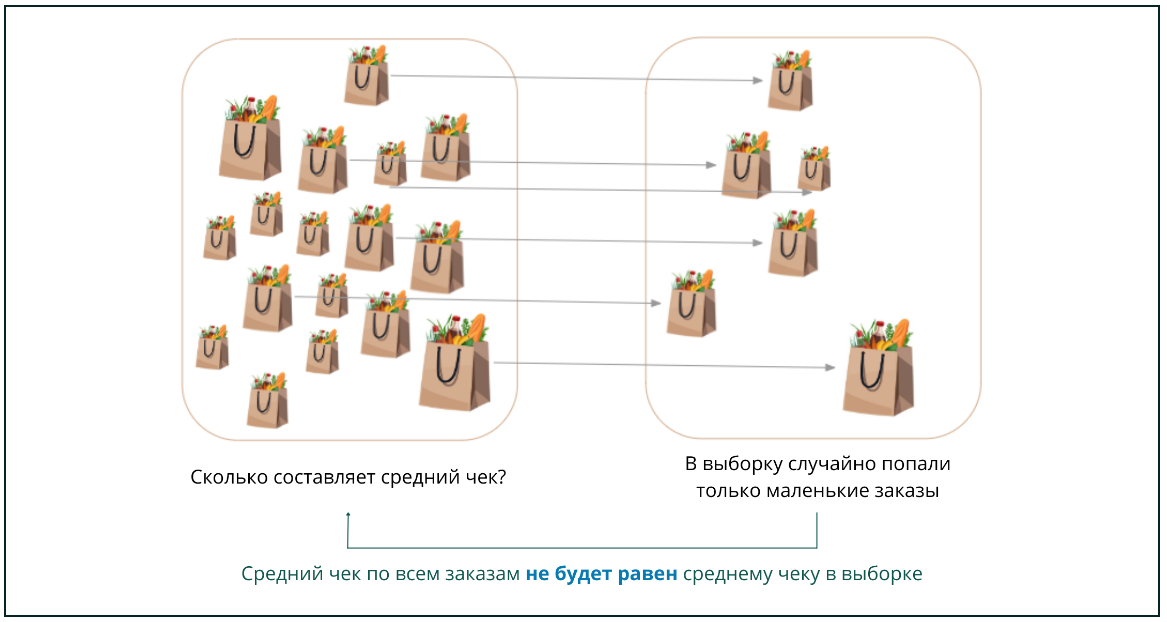

* Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
* Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

Резюмируем:

* Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.
* Статистические тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.
* Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.

## 3. Понятие статистической гипотезы

Итак, мы разобрались, в каких случаях необходимы статистические тесты. Настала пора знакомиться с ними, и мы начнём с важнейшего для статистических тестов понятия — статистической гипотезы.

Статистическая гипотеза — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.

Примечание. Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

### АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ

Общий алгоритм проверки гипотезы состоит из шести этапов:

1. Построение нулевой и альтернативной гипотез.
2. Выбор уровня значимости "альфа".
3. Сбор данных для проверки гипотезы.
4. Выбор статистического теста.
5. Проведение статистического теста, вычисление p-value.
6. Сравнение p-value c уровнем значимости "альфа" и вывод, отклонить или не отклонить нулевую гипотезу.

Далее мы подробно рассмотрим каждый из них.


### НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ

Проведение статистических тестов начинается с формулирования двух конкурирующих между собой статистических гипотез — нулевой и альтернативной.

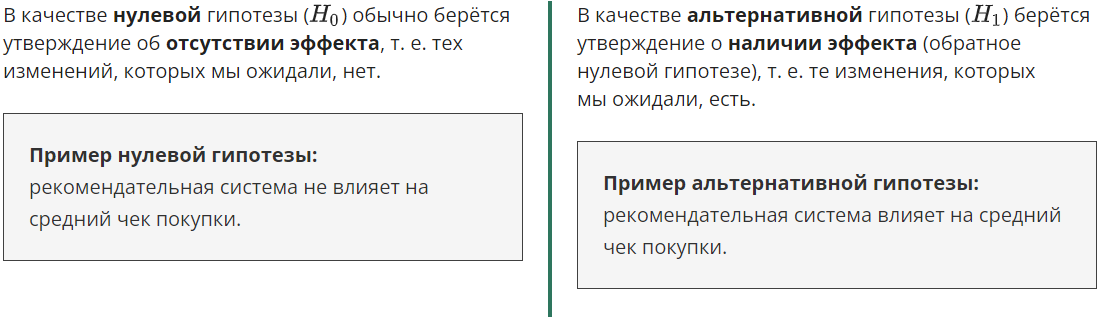

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

* отклоняем нулевую гипотезу в пользу альтернативной (делаем вывод, что эффект есть);
* не отклоняем нулевую гипотезу, так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).

Существует три варианта формулировки нулевой и альтернативной гипотез. Давайте рассмотрим формулировки вместе с их математической интерпретацией. Пусть "мю1" — средний чек покупки без просмотра рекомендаций,  "мю2"— средний чек покупки после просмотра рекомендаций.

Примечание. Ещё раз отметим, что "мю1" и "мю2" — средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), т. е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

Однако мы можем составить следующие бизнес-вопросы и соответствующие им гипотезы:

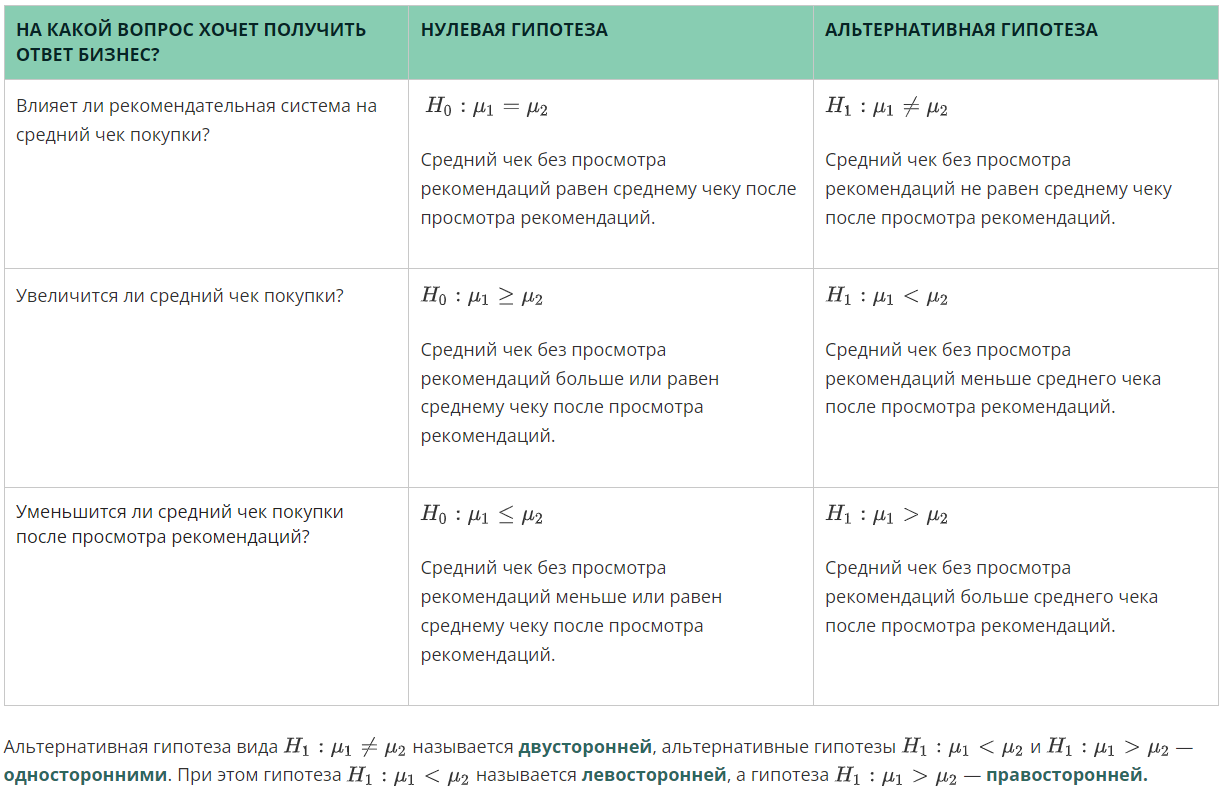

Рассмотрим тонкости формулировок гипотез более подробно.

1. В качестве первого примера возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций?».

Нулевая и альтернативная гипотезы будут следующими:

* 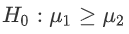 — после внедрения рекомендаций средний чек уменьшился или не изменился.
* 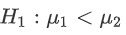— после внедрения рекомендаций средний чек увеличился.

Пусть мы сделали две выборки покупок (без и после просмотра рекомендаций) и получили следующие средние значения чека:

* без просмотра рекомендаций —  ;

* после просмотра рекомендаций —  .

Проверка этих гипотез позволит определить, существует (статистически значима) ли разница в размере чеков в 290 рублей на генеральных совокупностях. То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях  и .

Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. Мы знаем, что содержание натрия должно быть не более 300 мг на 100 г соуса, и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия (), должно быть меньше или равно 300 мг на 100 г.

Тогда нулевая и альтернативная гипотезы будут следующими:

* 
* 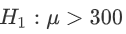


Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. Предположим, что среднее значение содержания натрия в выборке составило  мг на 100 г соуса.

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия () отличается от заявленного на упаковке. Возможно, что измеренное нами выборочное значение  является следствием погрешностей и случайностей.

Как видите, в приведённых выше примерах постановка задач и формулировка гипотез отличаются:

* В первом случае нам необходимо было сравнить два средних на двух генеральных совокупностях на основе данных из двух выборок.
* Во втором случае мы имели дело с одной выборкой и хотели проверить соответствие математического ожидания требуемому показателю.

Почему это важно? Далее мы увидим, что один из критериев выбора статистического теста, — это количество групп (выборок). Например, в первом случае мы будем выбирать среди двухвыборочных тестов, а во втором — среди одновыборочных.

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. Нулевая гипотеза — это утверждение об отсутствии эффекта, который мы хотим проверить, а альтернативная — утверждение о наличии такого эффекта.

Давайте закрепим полученные знания с помощью небольшого теста.

### 4. Статистическая значимость

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — насколько статистически значимы полученные нами результаты.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости (p-value).

### ОШИБКИ I И II РОДА

При проверке гипотезы возможно допустить ошибку одного из двух видов:

* Ошибка I (первого) рода: отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется "альфа"-ошибкой, или ложноположительным результатом.
* Ошибка II (второго) рода: неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется "бета"-ошибкой, или ложноотрицательным результатом.

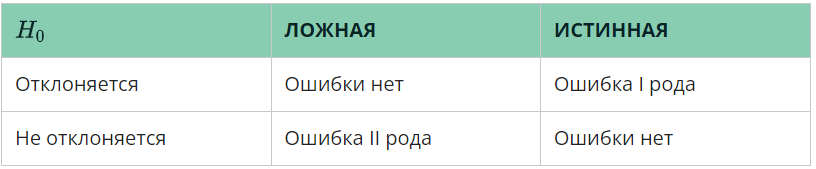

В примере про предварительную проверку рекомендательной системы на выборке покупателей ошибками первого и второго рода будут следующие ситуации:

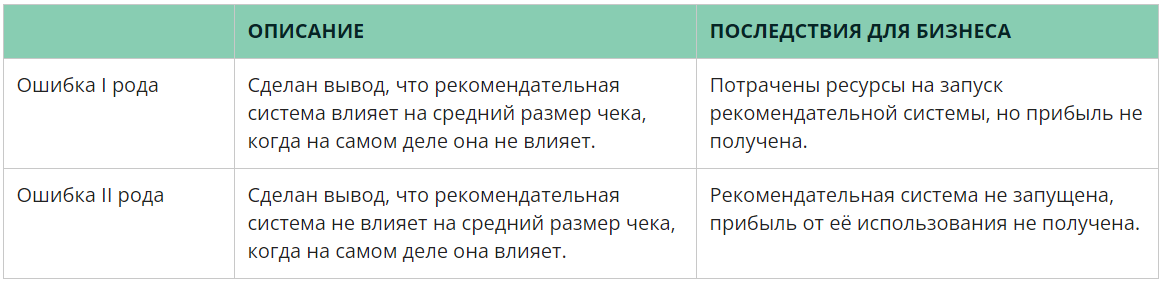

Как вы понимаете, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез.

Примечание. Вероятность не допустить ошибку II рода (1 - "бета") ещё называют мощностью теста. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).

Примечание. Ошибки первого и второго рода — предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

* Отнести образец к классу 1, когда он на самом деле относится к классу 0. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.
* Не отнести образец к классу 1, когда он на самом деле относится к классу 1. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.

Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. Подробнее об этом вы узнаете в модулях по машинному обучению.

### СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)

Мы разобрались, что может пойти не так при проверке гипотезы. Вернёмся к понятию статистической значимости.

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно график оценки плотности ядра (Kernel Density Estimation, KDE). Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

По оси x отложено значение случайной величины (например, размера чека), а по оси y — плотность вероятности (чем больше y, тем больше вероятность наблюдать значение по оси x). Детали построения графиков плотности вероятностей https://machinelearningmastery.ru/recipes-for-the-visualizations-of-data-distributions-a1527a0faf77/.

Примеры графиков плотности распределения вероятности (оранжевые) с соответствующими гистограммами:

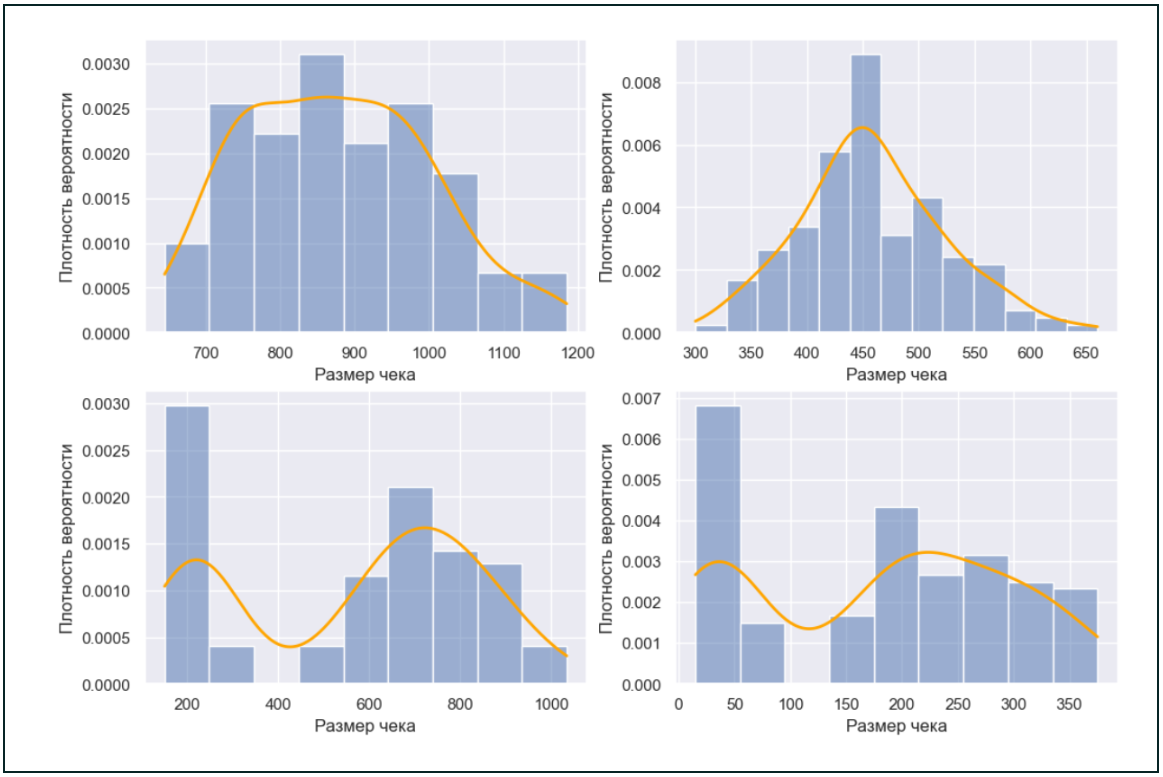

График плотности вероятности построен так, что вся площадь под кривой равна 1 — это вероятность всех возможных значений размера чека. Это следует из основного правила теории вероятностей: сумма вероятностей всех исходов (всех возможных значений чека) всегда равна 1.

Площадь под кривой на интервале от a до b (голубая область) соответствует вероятности получить среднее значение от a до b (на графике ниже такая вероятность ~ 0.3):

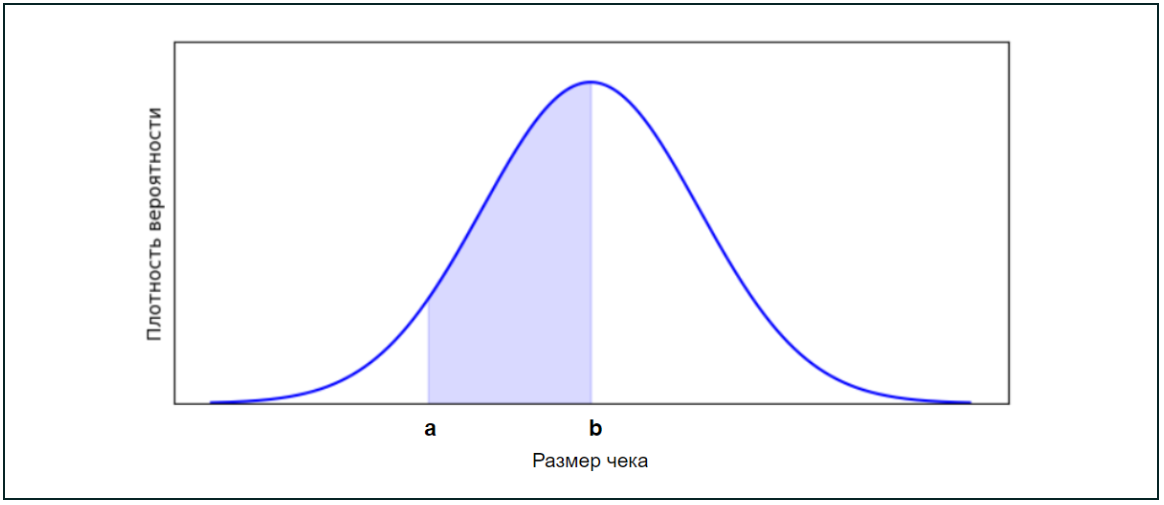

Например, если a = 350, а b = 500, это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне от 350 до 500 рублей составляет 0.3.

Теперь мы, наконец, готовы ввести понятие p-value.

Уровнем статистической значимости (p-value, p-значением) называется вероятность получить наблюдаемые или более экстремальные значения при условии, что нулевая гипотеза верна.

Рассмотрим это определение на примере ответа на вопрос «Средний чек покупки в онлайн-магазине больше 500 рублей?». Гипотезы будут следующими:

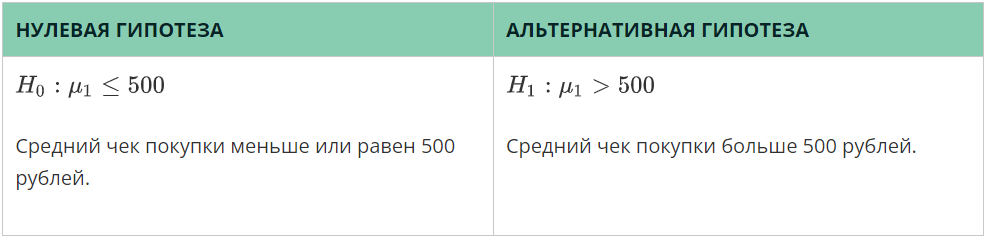

Сначала допустим, что верна нулевая гипотеза: средний чек покупки (на генеральной совокупности) меньше или равен 500 рублей.

Нам неизвестно, какой будет истинная форма плотности вероятности чека, которая получается на основе генеральной совокупности. Обычно предполагают какую-то форму из стандартных законов распределений, например, из нормального закона распределения, как на графике ниже (о нормальном распределении и его свойствах мы поговорим далее). Синяя пунктирная линия соответствует среднему чеку в 500 рублей, вокруг которого мы строим нулевую гипотезу:

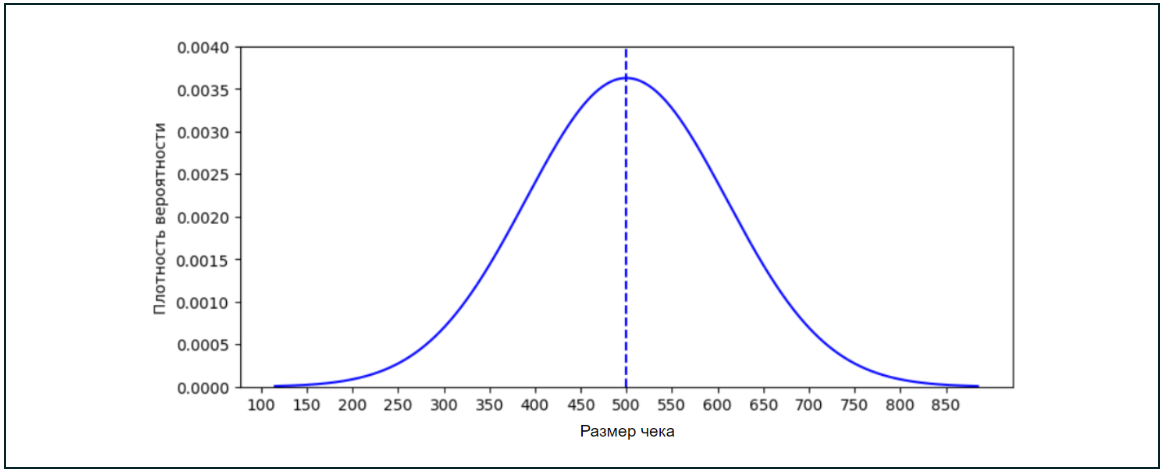

Пусть на выборке мы получили средний размер чека 700 рублей. Отметим это значение на графике:

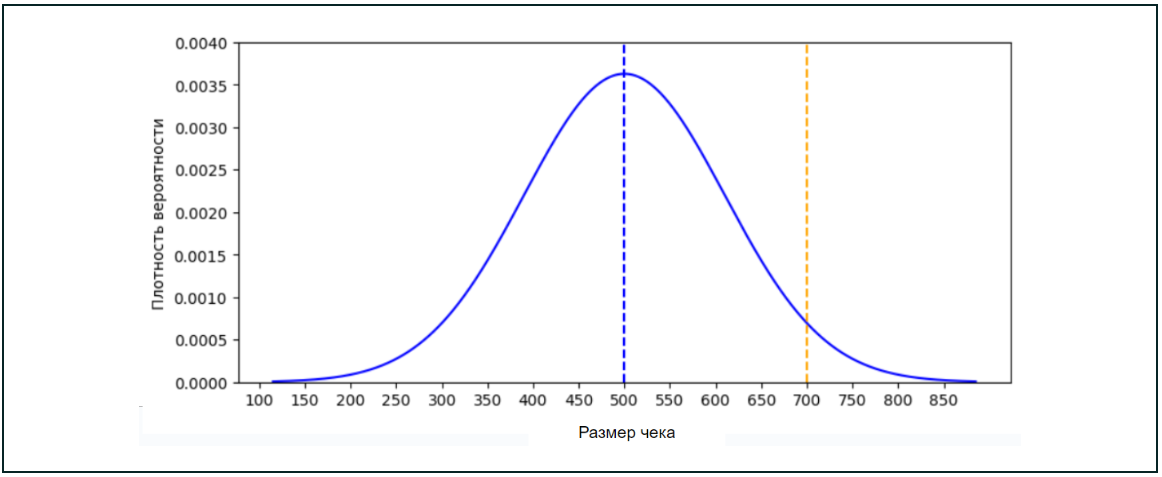

Какова вероятность получить такой же (700 рублей) или ещё больший средний чек при условии, что средний чек равен 500 рублям? Этой вероятностью будет площадь под кривой от 700 к большим значениям (p-value = p):

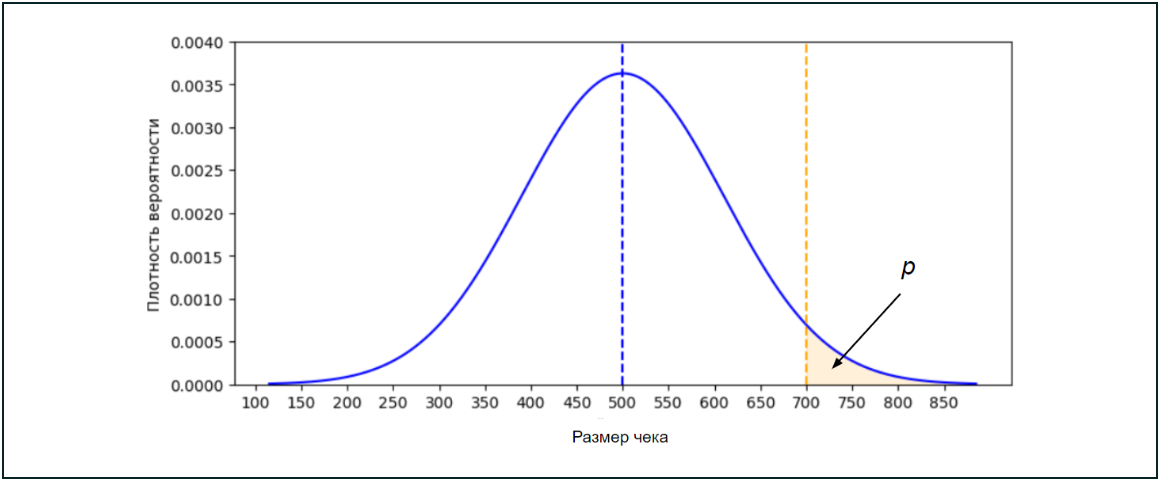

Чем больше было бы число, которое мы получили на выборке:

* тем меньше была бы площадь под кривой, т. е. меньше полученное значение p-value;
* тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека — 500 рублей или меньше.

Важно понимать, что p-value — это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.

Следующее необходимое нам понятие — уровень значимости.

Уровень значимости — это пороговая вероятность допустить ошибку I рода (вероятность отклонить нулевую гипотезу, когда она верна). Обычно это число обозначается за .

Если полученное значение p-value меньше заранее заданного уровня значимости , мы отвергаем нулевую гипотезу. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут  = 500. Это означает, что мы готовы к 5 % риску допустить ошибку I-ого рода (то есть сделать вывод, что эффект есть, хотя на самом деле его нет).

Итак:

Если полученное p-value ниже уровня значимости (), результаты статистически значимы и согласуются с альтернативной гипотезой.
Если полученное p-value выше уровня значимости (), результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу.
Примечание. Если p-value равно уровню значимости (), то возникает дилемма: принять нулевую гипотезу или отвергнуть её в зависимости от предварительных условий. На практике, если не оговорено других предварительных условий, в большинстве случаев нулевую гипотезу отвергают, если .

Иллюстрация принятия решения для проверки гипотезы:

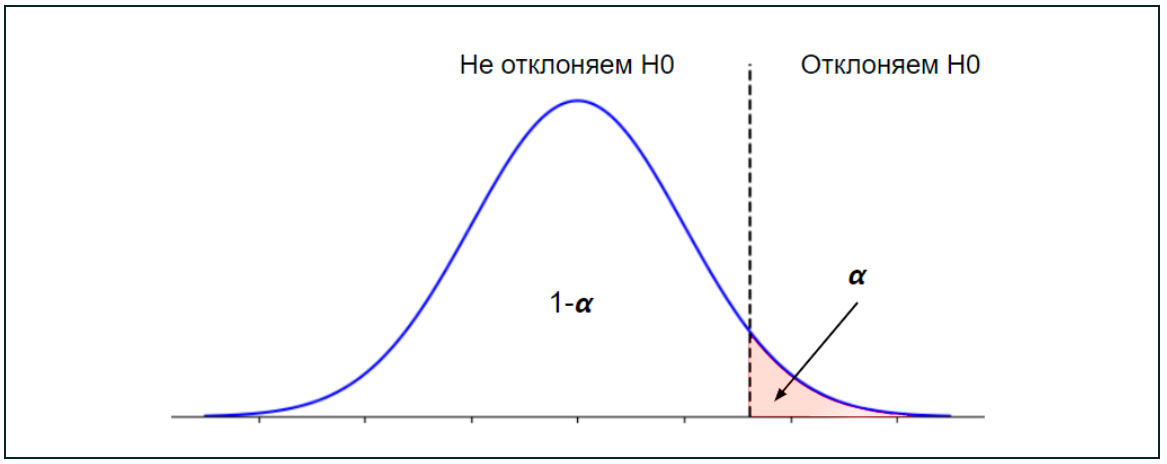

Примечание. Раньше специалисты по статистике вручную рассчитывали p-value по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. Теперь мы можем просто воспользоваться готовыми функциями из библиотек SciPy и Statsmodels для языка Python. Эти функции мы ещё разберём далее в модуле, а в этом юните опустим детали получения p-value.

В нашем примере p-value = 0.03 (пока мы опустили детали вычисления). Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на 200 и более рублей, составляет 0.03. Иллюстрация выглядит так:

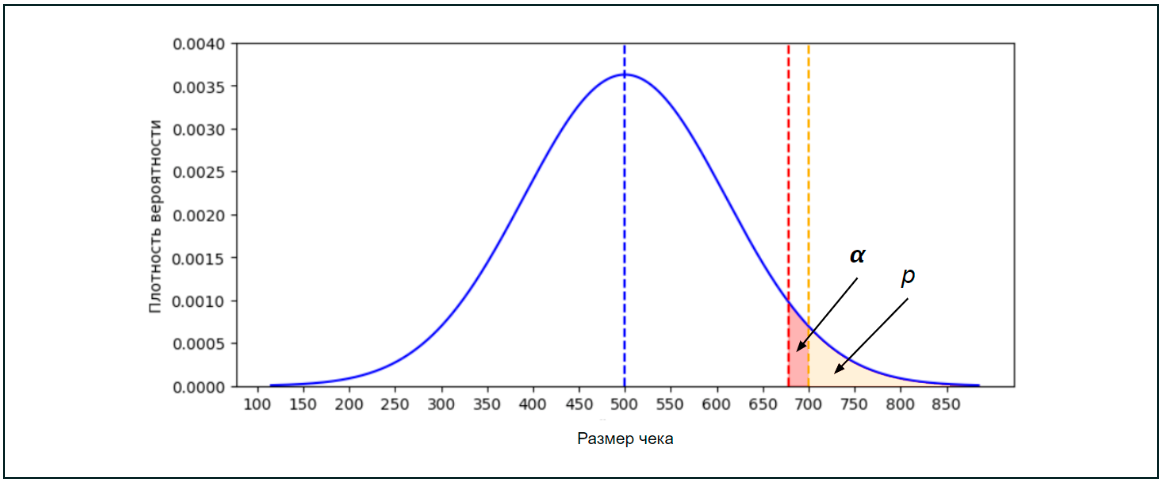

Площадь жёлтой области равняется p-value (0.03), площадь красной области равняется  (0.05). P-value меньше  — значит, мы можем отвергнуть нулевую гипотезу в пользу альтернативной и сказать, что средний чек покупки больше 500 рублей.

####  ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ

Выше мы приводили иллюстрацию принятия решения для проверки односторонней (правосторонней) гипотезы:

* одна область отклонения нулевой гипотезы (справа);
* площадь области = .

Аналогичная иллюстрация для левосторонней гипотезы:

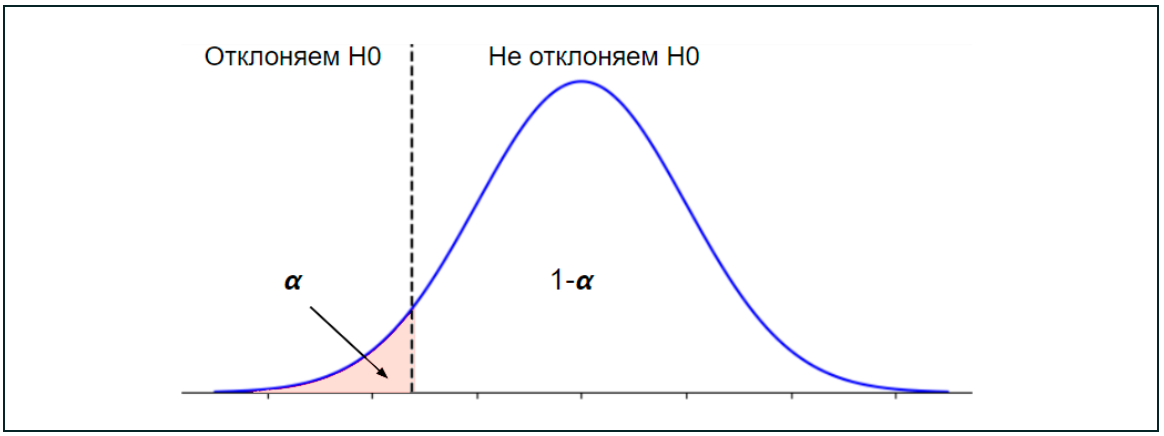

Для двусторонней гипотезы иллюстрация будет следующей:

* две области отклонения нулевой гипотезы (справа и слева);
* площадь каждой области =  / 2.

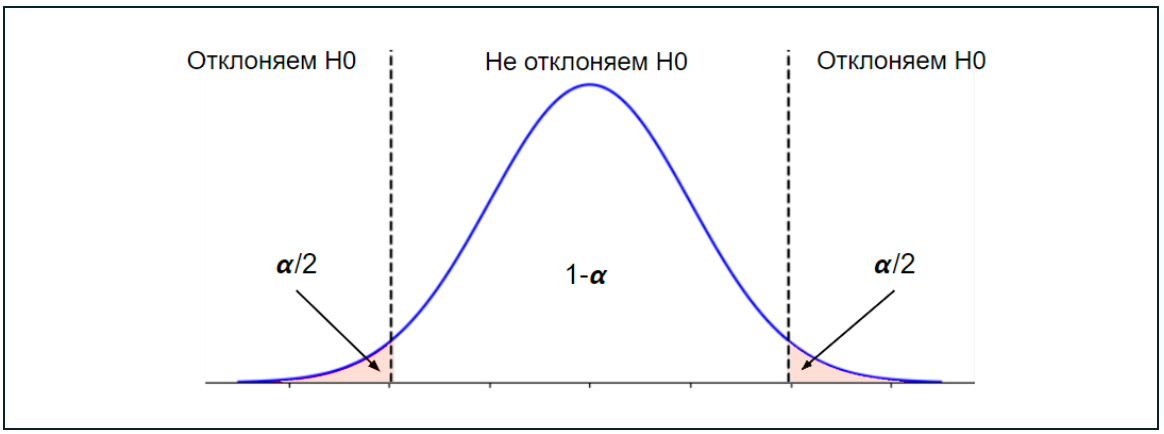

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны — и в большую, и в меньшую. В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах.

#### КАК ВЫБРАТЬ  ?

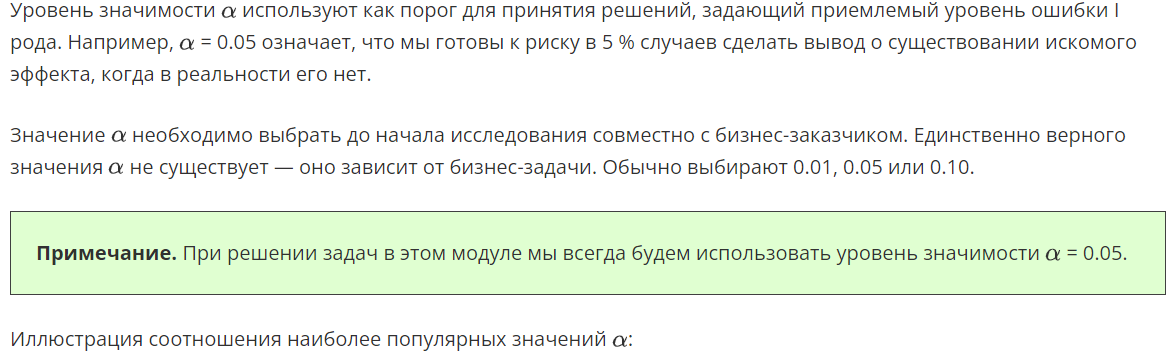
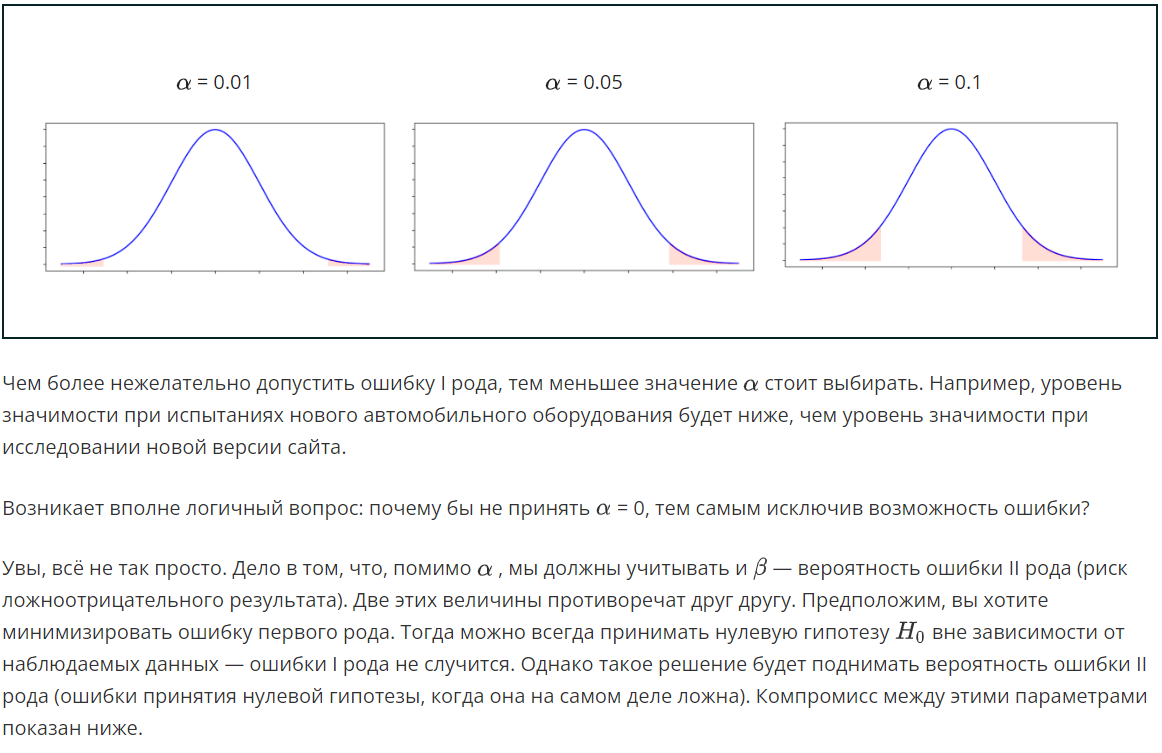
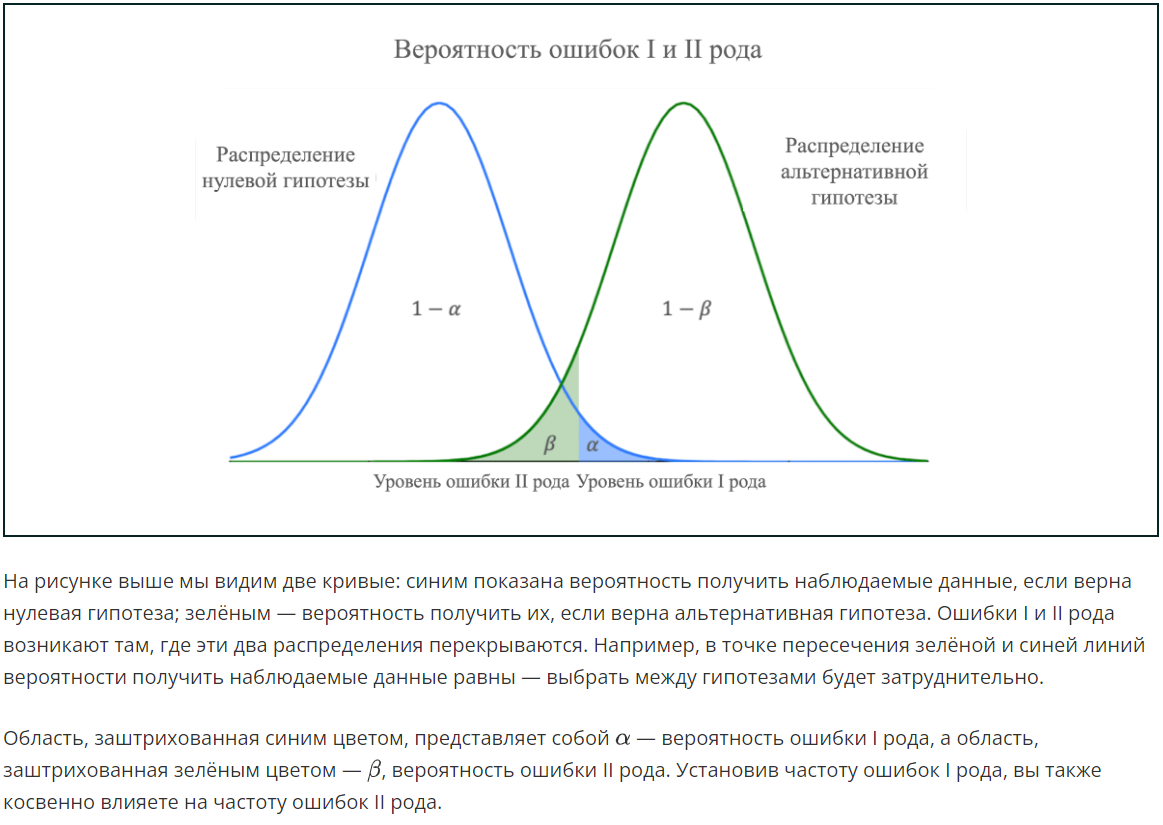
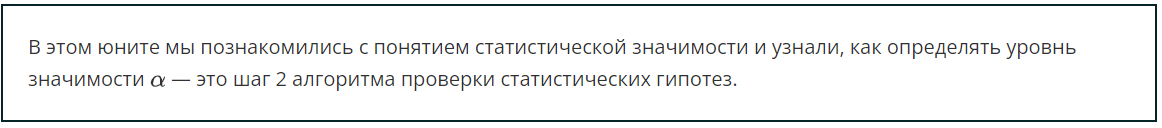